<h1 style="color:#336699; background:#f5f5f5">Optimizing Instant Noodles Supply Chain with Machine Learning: A Regression Analysis</h1>

### Supply Chain Management

Supply chain management involves overseeing the flow of goods and services, encompassing all stages that convert raw materials into final products. It aims to optimize a business's supply-related activities to enhance customer value and achieve a competitive edge in the market.

Although the core components of a supply chain remain consistent, the specific procedures may vary from one company to another. Nonetheless, it encompasses all stages from procuring raw materials to delivering them according to customer demand.

**Supply Chain Process**

- Planning: Coordinate resources to meet customer demand and establish performance metrics.
- Sourcing: Choose suppliers and manage supplier relationships, including ordering, receiving, inventory, and payments.
- Manufacturing: Organize activities from raw materials to product delivery, including quality testing and packaging.
- Delivery and Logistics: Manage customer orders, deliveries, invoices, and payments efficiently.
- Returns: Establish a system for handling defective or excess products within the supply chain.

**FMCG Supply Chain**

Managing and making changes to FMCG supply chains can be challenging due to their immense complexity, involving numerous distribution centers, factories, product variants, and a vast customer base. 

Significant Challenges in FMCG Supply Chain:

- Demand Volatility: Rapid shifts in consumer demand require accurate forecasting and quick adjustments.
- Short Shelf Life: Managing perishable items effectively to minimize waste is critical.
- High Competition: Intense competition requires rapid response to market trends and changing consumer preferences.
- Complex Distribution: FMCG goods often pass through multiple distribution channels before reaching consumers, increasing the     risk of inefficiencies.
- Supply Chain Visibility: Ensuring real-time visibility of product movements is crucial for informed decision-making.
- Cost Pressures: Balancing cost reduction with maintaining product quality is an ongoing concern.
- Environmental Sustainability: Meeting sustainability goals while managing the supply chain's environmental impact is a growing   priority.

**Supply Chain Optimization Using Data**

Manufacturers and retailers generate extensive data through their supply chain operations, which is then harnessed by supply chain optimization from both internal systems and external sources to enhance efficiency and performance.An efficient supply chain relies on a multitude of data sources to optimize its operations. 
Product Information: Details about each product and its interrelations with other products.

- Demand Insights: Historical sales data and future sales forecasts obtained from demand forecasting.

- Warehouse Details: Information encompassing warehousing contracts, available storage space, equipment, and staffing particulars.

- Inventory Tracking: Specifics about current inventory, including its value, volume, and distribution across various distribution points.

- Production Insights: Information concerning the entire product line and the current production capacity for each product.

- Logistics Overview: Comprehensive data covering all aspects of product transportation, including customer deliveries, inter- center transfers, and stock movements between locations.

- Financial Data: Financial information specifying the costs associated with product production, transportation, and    warehousing.

- External Sources: Data obtained from third-party sources, such as weather data and consumer packaged goods (CPG) data, providing additional insights and context for supply chain management.

### Problem Description

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two years back. Their higher management has noticed that there is a mismatch in the demand and supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country.

The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse.

<p style="text-align: center;"><strong>Data Dictionary</strong></p>


| Column Name                 | Description                                                                                   |
|:-----------------------------:|:-----------------------------------------------------------------------------------------------:|
| Ware_house_ID               | Unique identifiers for individual warehouses.                                                  |
| WH_Manager_ID               | Unique identifiers for warehouse managers.                                                      |
| Location_type               | Indicates the type of location where each warehouse is situated.                                |
| WH_capacity_size            | Represents the capacity or size of each warehouse.                                              |
| zone                        | Categorizes warehouses into specific zones.                                                      |
| WH_regional_zone            | Assigns each warehouse to a regional zone.                                                        |
| num_refill_req_l3m          | Records the number of refill requests received in the last 3 months.                            |
| transport_issue_l1y         | Indicates if there have been any transport-related issues within the last year.                |
| Competitor_in_mkt           | Specifies the presence of competitors in the market.                                             |
| retail_shop_num             | Provides the number of retail shops associated with each warehouse.                               |
| wh_owner_type               | Describes the ownership type of each warehouse.                                                  |
| distributor_num             | Represents the number of distributors associated with each warehouse.                              |
| flood_impacted              | Indicates whether a warehouse has been impacted by floods.                                       |
| flood_proof                 | Specifies whether a warehouse is flood-proof.                                                    |
| electric_supply             | Indicates the status of electric supply to each warehouse.                                       |
| dist_from_hub               | Represents the distance of each warehouse from the hub.                                          |
| workers_num                 | Provides the number of workers employed at each warehouse.                                        |
| wh_est_year                 | Represents the year in which each warehouse was established.                                     |
| storage_issue_reported_l3m  | Indicates whether any storage issues have been reported in the last 3 months.                   |
| temp_reg_mach               | Specifies the presence of temperature regulation machinery at each warehouse.                   |
| approved_wh_govt_certificate | Indicates if each warehouse has an approved government certificate.                                |
| wh_breakdown_l3m            | Indicates whether any breakdowns have occurred at each warehouse in the last 3 months.          |
| govt_check_l3m              | Indicates if government checks have been conducted for each warehouse in the last 3 months.     |
| product_wg_ton              | Represents the weight of the product in tons.                                                   

### Constructing a Regression Model - Steps

1. **Data Preparation and Analysis:**

    - Explore and clean training data.
    - Analyze variable distributions and correlations.
    - Encode categorical variables.
    - Split data into independent and predictor variables.
    
2. **Test Data Preprocessing:**

   - Prepare test data using the same preprocessing steps**

3. **Regression Modeling:**

   - Train a Linear Regression Model.
   - Evaluate Ensemble Learning Algorithms: Gradient Boost, AdaBoost, Random Forest, Bagging.

4. **Hyperparameter Tuning:**

   - Optimize model hyperparameters using Randomized Search Cross-Validation.

5. **Predictions and Regression Plot:**

   - Use the best model to predict test data
   - Create a regression plot to visualize predicted vs. actual values.

6. **Conclusion**

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Train Data Preprocessing and Analysis

In [2]:
# Loading train dataset to 'df' variable
df=pd.read_csv(r"C:\Entri\ML_Projects\Capstone\supply_train.csv")
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


### Data Exploration

In [3]:
df.shape

(16620, 25)

Shape of the dataframe shows that there are 16620 rows and 25 columns.

In [4]:
#List of columns in the dataset
df.columns.to_list()

['Unnamed: 0',
 'Ware_house_ID',
 'WH_Manager_ID',
 'Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'num_refill_req_l3m',
 'transport_issue_l1y',
 'Competitor_in_mkt',
 'retail_shop_num',
 'wh_owner_type',
 'distributor_num',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'dist_from_hub',
 'workers_num',
 'wh_est_year',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'approved_wh_govt_certificate',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'product_wg_ton']

In [5]:
#Structure of dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

### Data Cleaning

In [6]:
# Identifying duplicate rows in the dataset if any
df.duplicated().sum()

0

There are no duplicate rows in the dataset

In [7]:
# Sum of missing values column wise
df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

Missing values are found in 'workers_num','wh_est_year' and 'approved_wh_govt_certificate'.

##### Removing irrelevant columns

In [8]:
# Dropping columns which are not of much relevence while developing a model
df1 = df.drop(columns=['Unnamed: 0','Ware_house_ID','WH_Manager_ID'])
df1

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,Urban,Large,West,Zone 6,3,1,6,4779,Rented,70,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,Urban,Large,North,Zone 5,2,0,2,5718,Company Owned,26,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,Rural,Large,North,Zone 6,5,0,4,4514,Company Owned,50,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,Rural,Small,West,Zone 6,3,2,3,5829,Rented,59,...,1,119,NaN,2007.0,16,0,A,5,15,21103


##### Replacing missing values 

In [9]:
# Distribution of values 'workers_num'(number of workers in the warehouse) column.
df1['workers_num'].describe()

count    15953.000000
mean        28.911490
std          7.842046
min         10.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         98.000000
Name: workers_num, dtype: float64

On an average there are 28 workers in a warehouse. The mean and median values are found to be same.

In [10]:
# Median of 'workers_num'
df1['workers_num'].median()

28.0

In [11]:
# Replacing missing values in 'workers_num' with median
df1['workers_num'].fillna(df1['workers_num'].median(),inplace=True)

In [12]:
# Distribution of values 'wh_est_year'(The year in which each warehouse was established) column.
df1['wh_est_year'].describe()

count    8760.000000
mean     2009.345320
std         7.544672
min      1996.000000
25%      2003.000000
50%      2009.000000
75%      2016.000000
max      2023.000000
Name: wh_est_year, dtype: float64

The mean value of wh_est_year is found to be 2009.

In [13]:
# Replacing missing values in 'wh_est_year' with mean
df1['wh_est_year'].fillna(df1['wh_est_year'].mean(),inplace=True)

In [14]:
# Mode of 'approved_wh_govt_certificate'
df1['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

Certification which is most frequent is 'C'

In [15]:
# Replacing missing values in 'approved_wh_govt_certificate' with mode
df1['approved_wh_govt_certificate'].fillna(df1['approved_wh_govt_certificate'].mode()[0],inplace=True)

In [16]:
df1.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

All the null values in the entire dataframe has been replaced.

In [17]:
# Changing datatype of workers_num and wh_est_year to integer
df1['workers_num']=df1['workers_num'].astype(int)
df1['wh_est_year']=df1['wh_est_year'].astype(int)

In [18]:
print(df1[['workers_num', 'wh_est_year']].dtypes)

workers_num    int32
wh_est_year    int32
dtype: object


In [19]:
#Categorical and numerical features in the dataset
print("Categorical columns are:\n\n",df1.select_dtypes(include=['object']).columns.to_list())
print("\nNumerical columns are:\n\n",df1.select_dtypes(exclude=['object']).columns.to_list())

Categorical columns are:

 ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

Numerical columns are:

 ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']


In [20]:
# Unique values in each feature and finding its length
for column in df1.columns:
    print('\033[1m',column,'\033[0m')
    print("Unique Values:",df1[column].unique())
    print("Length:",df1[column].nunique(),"\n")

 Location_type 
Unique Values: ['Urban' 'Rural']
Length: 2 

 WH_capacity_size 
Unique Values: ['Small' 'Large' 'Mid']
Length: 3 

 zone 
Unique Values: ['West' 'North' 'South' 'East']
Length: 4 

 WH_regional_zone 
Unique Values: ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Length: 6 

 num_refill_req_l3m 
Unique Values: [3 0 1 7 8 4 6 5 2]
Length: 9 

 transport_issue_l1y 
Unique Values: [1 0 4 3 2 5]
Length: 6 

 Competitor_in_mkt 
Unique Values: [ 2  4  3  5  1  8  7  6 10  9 12  0]
Length: 12 

 retail_shop_num 
Unique Values: [4651 6217 4306 ... 2716 8344 7347]
Length: 4356 

 wh_owner_type 
Unique Values: ['Rented' 'Company Owned']
Length: 2 

 distributor_num 
Unique Values: [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]
Length: 56 

 flood_impacted 
Unique Values: [0 1]
Length: 2 

 flood_proof 
Unique Values: [1 0]
Length: 2 

 electric_suppl

### Data Analysis

In [21]:
df1.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29,2009,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31,2009,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37,2009,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21,2009,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25,2009,18,0,C,6,24,24071


#### Analysis of categorical features

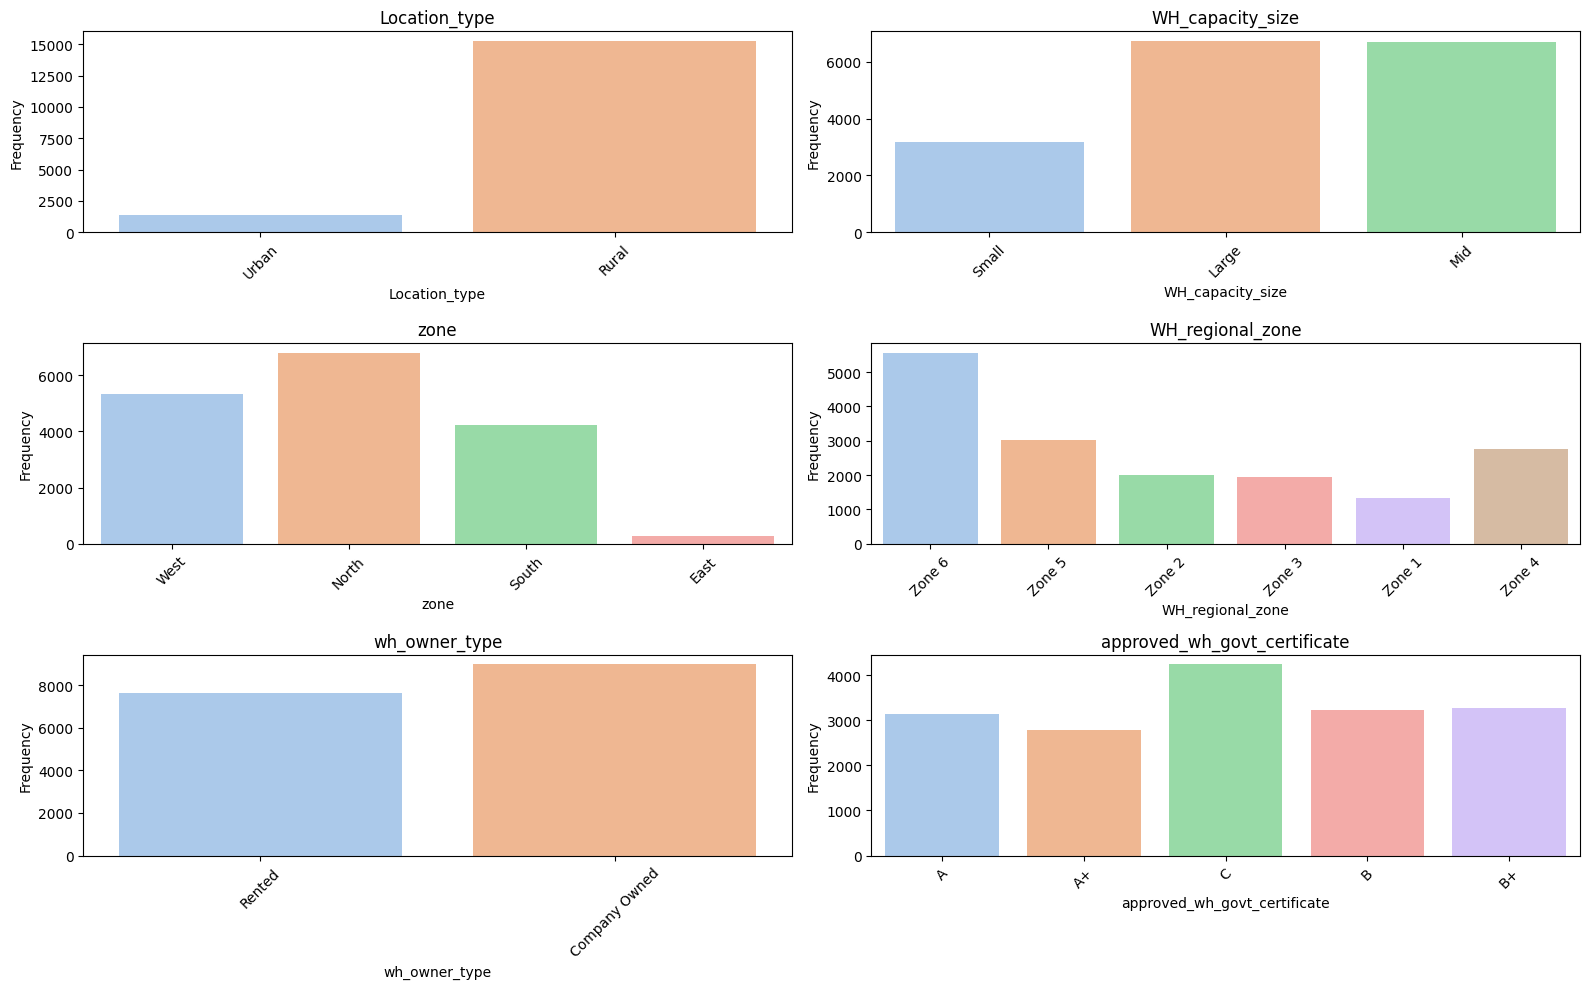

In [22]:
# Count plots of categorical features
categorical_columns = df1.select_dtypes(include=['object'])

plt.figure(figsize=(16, 10))

for column in categorical_columns.columns:
    plt.subplot(3, 2, categorical_columns.columns.get_loc(column) + 1)   
    sns.countplot(data=df1, x=column,palette='pastel')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Some important insights from above analysis are:
- Majority of warehouses are located at the rural areas.
- There are almost same number of warehouses with 'large' and 'medium' capacities and very few ones with 'small' capacity.
- Most of the warehouses are concentrated in the North zone, followed by West and South zones.
- Zone 6 has the maximum number of warehouses
- Majority of warehouses are company owned
- Most of the warehouses have been issued 'C' category certificate.

#### Distribution of target variable'product weight (product_wg_ton)' across categorical features

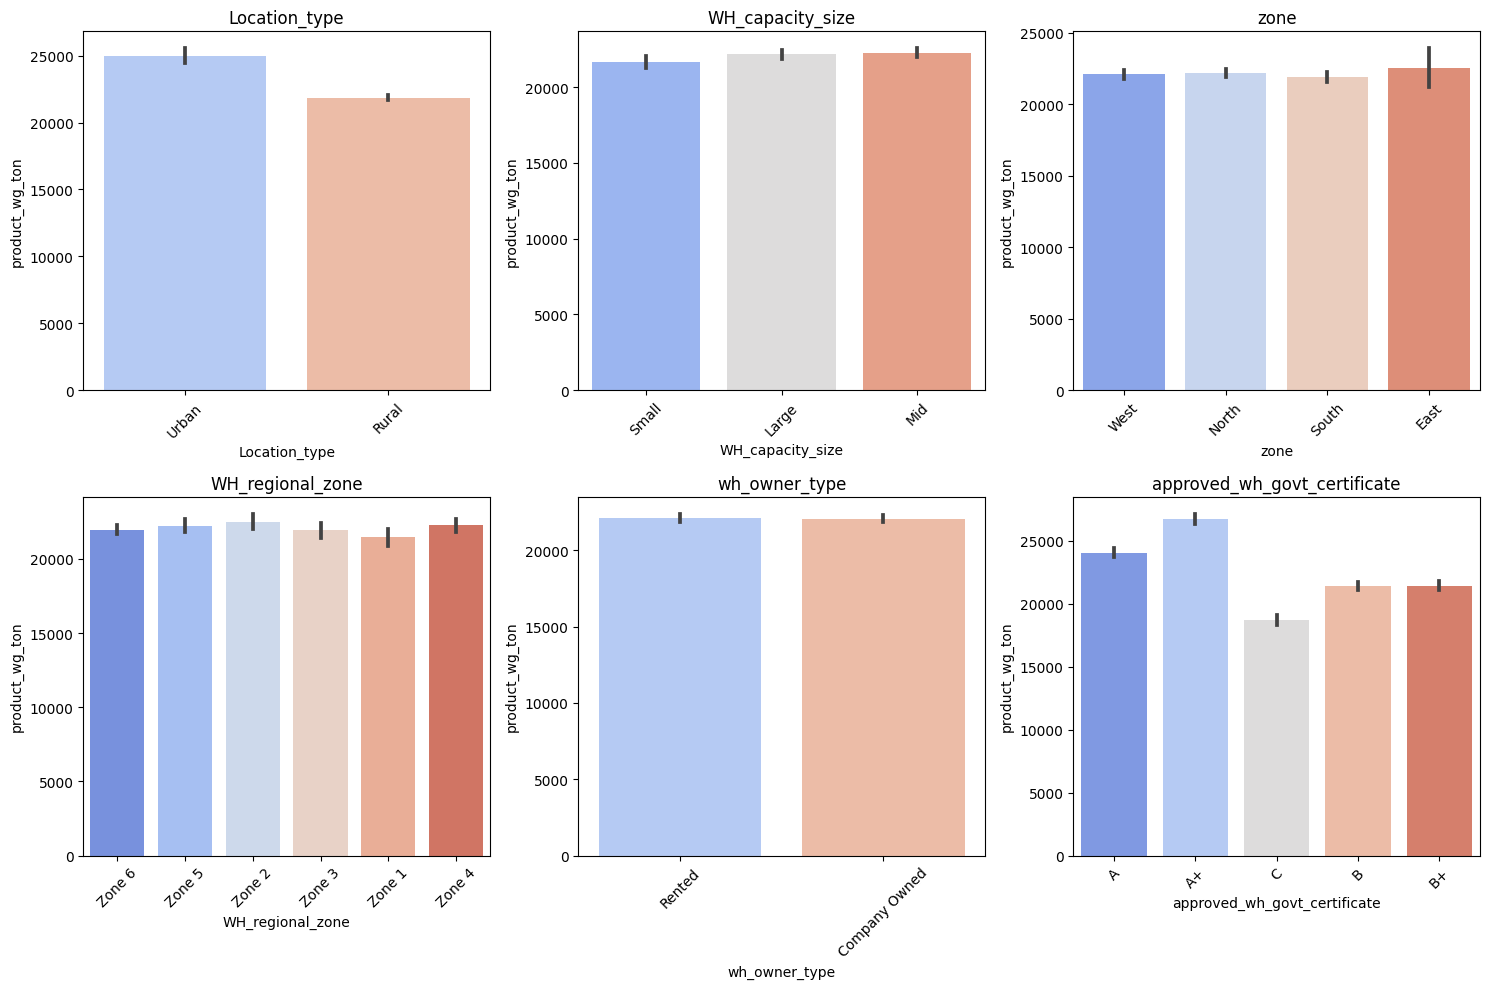

In [23]:
plt.figure(figsize=(15, 10))  
num_columns = len(categorical_columns)

# grid of subplots for categorical columns
for idx, column in enumerate(categorical_columns, start=1):
    plt.subplot(2, 3, idx)
    sns.barplot(data=df1, x=column, y='product_wg_ton',palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

- Larger shipment sizes (product weight) are more for Urban areas.
- Shipment sizes do not show much variation based on Warehouse capacity. 
- Product weights are slightly higher for "East" zone when compared to all the other zones.
- Shipment sizes are not influenced by warehouse owner type (wh_owner_type)
- A+ or A certified warehouses can handle larger shipment sizes.

#### Analysis of numerical features

In [24]:
numerical_columns = df1.select_dtypes(include=['number'])
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,16620.0,4.126655,2.606241,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,16620.0,0.780927,1.206351,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,16620.0,3.103129,1.147711,0.0,2.0,3.0,4.0,12.0
retail_shop_num,16620.0,4983.904994,1051.032239,1821.0,4309.0,4856.0,5500.0,11008.0
distributor_num,16620.0,42.473706,16.090000,15.0,29.0,42.0,56.0,70.0
flood_impacted,16620.0,0.096871,0.295791,0.0,0.0,0.0,0.0,1.0
flood_proof,16620.0,0.056017,0.229961,0.0,0.0,0.0,0.0,1.0
electric_supply,16620.0,0.655716,0.475149,0.0,0.0,1.0,1.0,1.0
dist_from_hub,16620.0,163.521901,62.701193,55.0,109.0,164.0,218.0,271.0
workers_num,16620.0,28.874910,7.685148,10.0,24.0,28.0,33.0,98.0


From above statistical summary it can be noted that:
- There are 2 to 12 competitors (Competitor_in_mkt), with an average of 3 competitors in every regional zone. 
- Number of retail shops (retail_shop_num) which sell noodles produced ranges from 4309 to 11008 based on different regions.
- Transport issues (transport_issue_l1y) reported for warehouses for the last one year is very low. Less than 75% of data shows   only a maximum of 1 issue reported.
- On an average there are 42 distributors (distributor_num) associated with each warehouse.
- An average of 28 workers (workers_num) are employed in each warehouse and the maximum number goes upto 98.
- The average number of storage issues (storage_issue_reported_l3m) reported is 17 in the last 3 months and a maximum of 39 issues have been reported in case of some warehouses.
- Government checks have been conducted on an average of 18 times in last 3 months. Maximum number of checks conducted is 32.

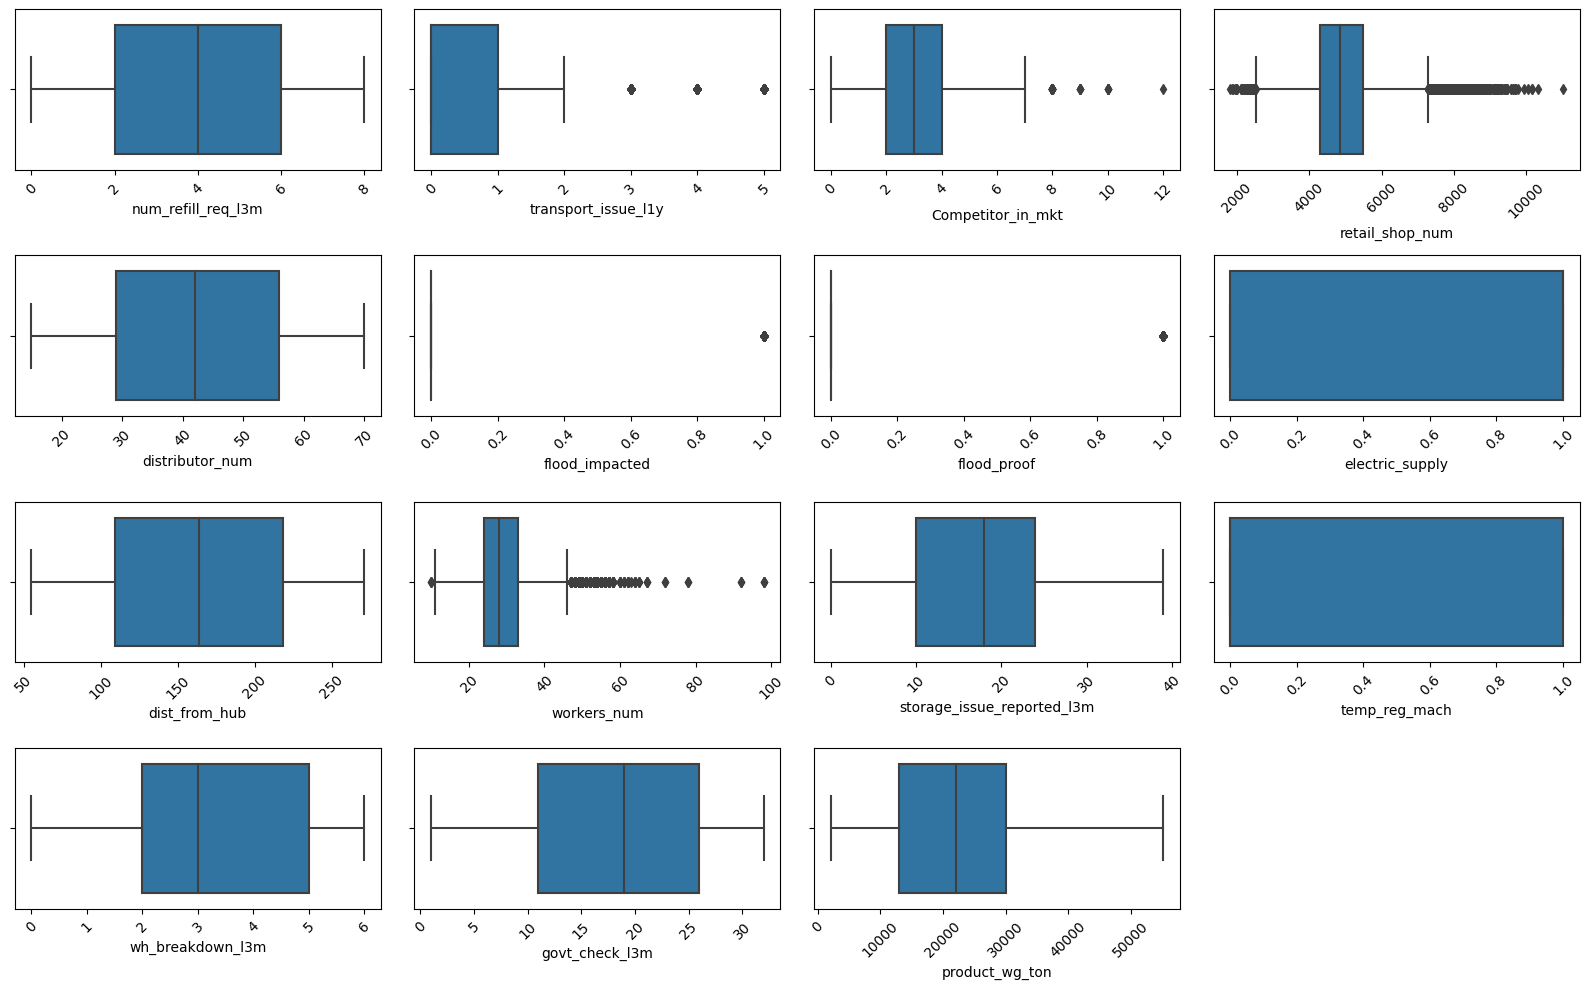

In [25]:
#Distribution of numerical features
numerical_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 
                     'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 
                     'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']

plt.figure(figsize=(16, 10)) 

for column in numerical_columns:
    plt.subplot(4, 4, numerical_columns.index(column) + 1)
    sns.boxplot(x=column, data=df1)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

transport_issue_l1y (transport related issues) and Competitor_in_mkt (competitors in the market) are distributions which show slight right skewness. retail_shop_num (number of retail shops) and workers_num (number of workers) have relatively few larger values.

#### Demand Distribution Across Zones

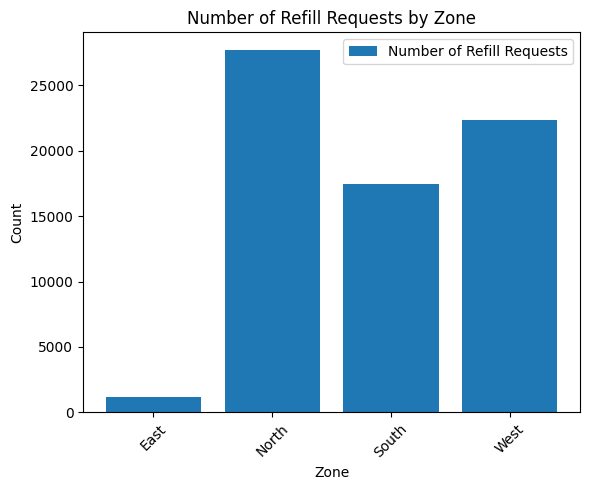

In [26]:
# Group the data by 'zone' and calculate the sum of 'num_refill_req_l3m' and 'retail_shop_num' for each zone
grouped_data = df1.groupby('zone').sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(6,5))
plt.bar(grouped_data['zone'], grouped_data['num_refill_req_l3m'], label='Number of Refill Requests')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.title('Number of Refill Requests by Zone')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Maximum product refill requests are for the North Zone.

#### Supply Chain Efficiency

Number of storage, transport and warehouse breakdown issues across different zones.

In [27]:
# Group data by zone and calculate the count of storage and transport issues in each zone
zone_issues = df1.groupby('zone')[['storage_issue_reported_l3m', 'transport_issue_l1y','wh_breakdown_l3m']].sum().reset_index()
zone_issues

,zone,storage_issue_reported_l3m,transport_issue_l1y,wh_breakdown_l3m
0,East,4886,211,967
1,North,116895,5395,23594
2,South,71683,3292,14648
3,West,91190,4081,18813


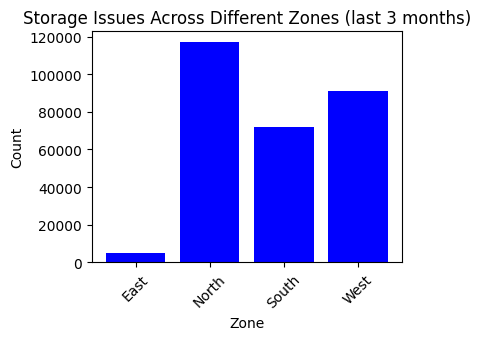

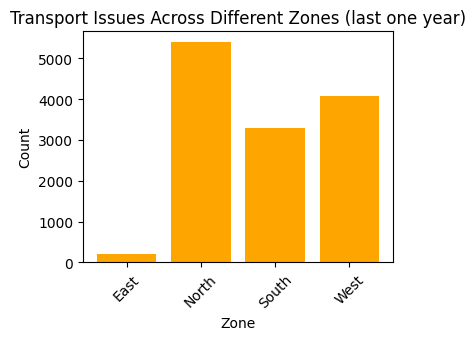

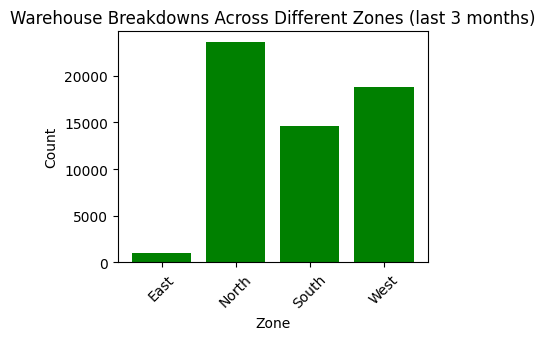

In [28]:
zones = zone_issues['zone']
storage_issue = zone_issues['storage_issue_reported_l3m']
transport_issue = zone_issues['transport_issue_l1y']
wh_breakdown = zone_issues['wh_breakdown_l3m']

# Create a function to generate bar charts
def create_bar_chart(x, y, title, color, ylabel):
    plt.figure(figsize=(4,3))
    plt.bar(x, y, color=color)
    plt.xlabel('Zone')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Create individual bar charts
create_bar_chart(zones, storage_issue, 'Storage Issues Across Different Zones (last 3 months)', 'blue', 'Count')
create_bar_chart(zones, transport_issue, 'Transport Issues Across Different Zones (last one year)', 'orange', 'Count')
create_bar_chart(zones, wh_breakdown, 'Warehouse Breakdowns Across Different Zones (last 3 months)', 'green', 'Count')

North zone faces a higher number of storage issues, transport issues, and warehouse breakdowns compared to all other zones. The East zone has a relatively smaller number of issues. Considering the data from the last 3 months, the counts of storage and warehouse issues across zones are higher. In comparison, the number of transport issues reported for a whole year is lower.

#### Competitiveness in the market

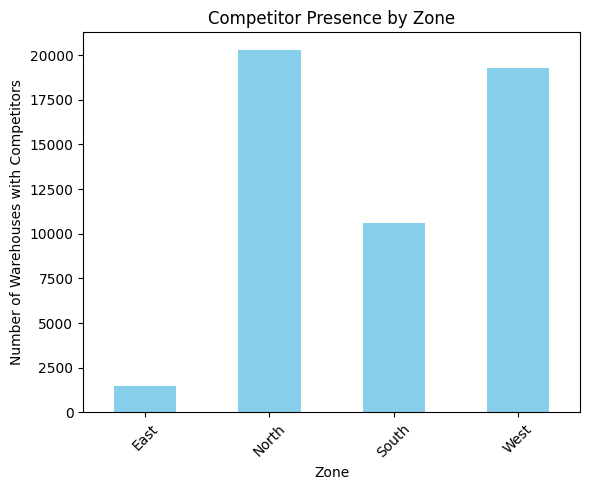

In [29]:
# Group the data by 'zone' and count the number of warehouses with competitors in each zone
competitor_count = df1.groupby('zone')['Competitor_in_mkt'].sum()

# Plotting the bar chart
plt.figure(figsize=(6,5))
competitor_count.plot(kind='bar', color='skyblue')
plt.xlabel('Zone')
plt.ylabel('Number of Warehouses with Competitors')
plt.title('Competitor Presence by Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

More number of competitors are concentrated in North and West Zones.

#### Operational Risk Analysis
Analysis of risk factors associated with each warehouse, such as flood impact (flood_impacted), electric supply status (electric_supply), and government checks (govt_check_l3m)

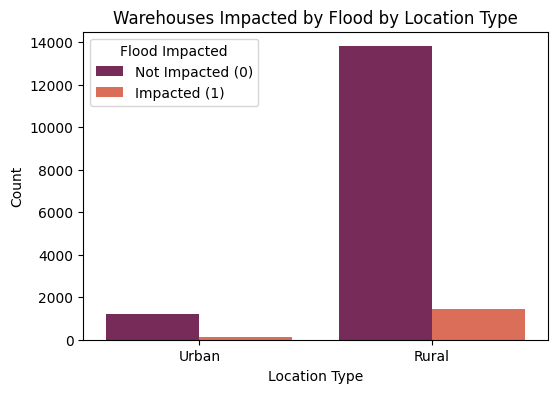

In [30]:
#Bar chart for warehouses impacted by floods by location type
plt.figure(figsize=(6,4))

sns.countplot(data=df1, x='Location_type', hue='flood_impacted', palette='rocket')

plt.title('Warehouses Impacted by Flood by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Flood Impacted', labels=['Not Impacted (0)', 'Impacted (1)'])

plt.show()

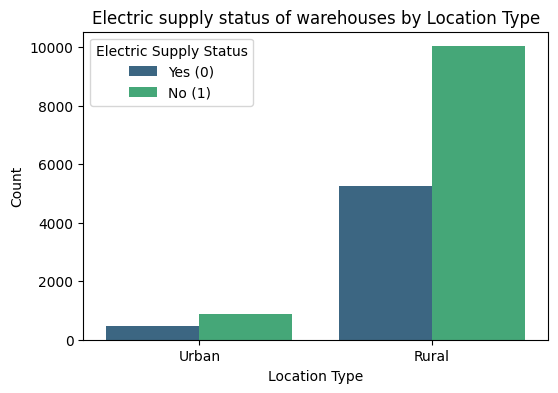

In [31]:
# Bar chart for electrical supply status of warehouses by location type
plt.figure(figsize=(6,4))
sns.countplot(data=df1, x='Location_type', hue='electric_supply', palette='viridis')

plt.title('Electric supply status of warehouses by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Electric Supply Status', labels=['Yes (0)', 'No (1)'])

plt.show()

Warehouses in rural areas require enhancements in both flood resilience and electric supply status.

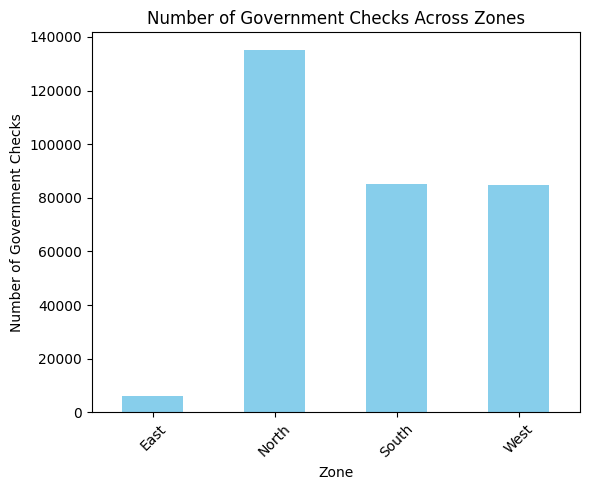

In [32]:
# Group the data by 'zone' and count the number of government checks in each zone
govt_check_count = df1.groupby('zone')['govt_check_l3m'].sum()

plt.figure(figsize=(6,5))
govt_check_count.plot(kind='bar', color='skyblue')
plt.xlabel('Zone')
plt.ylabel('Number of Government Checks')
plt.title('Number of Government Checks Across Zones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Distribution of target variable - 'product_wg_ton'

In [33]:
df1['product_wg_ton'].describe()

count    16620.000000
mean     22098.420096
std      11620.337346
min       2093.000000
25%      13057.000000
50%      22099.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64

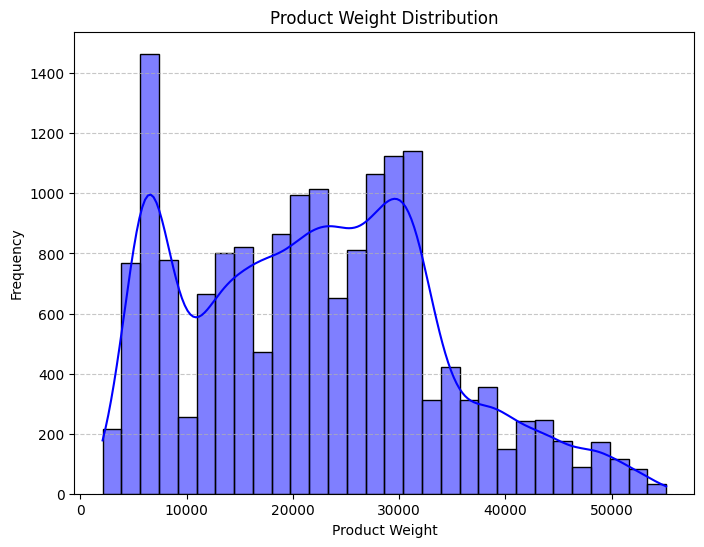

In [34]:
# histogram plot 
plt.figure(figsize=(8,6))
sns.histplot(df1['product_wg_ton'], bins=30, kde=True, color='blue')
plt.title('Product Weight Distribution')
plt.xlabel('Product Weight')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

There is variability in product weights,with high standard deviation. Some product weights are significantly heavier or lighter than the mean.

##### Correlation between numerical features

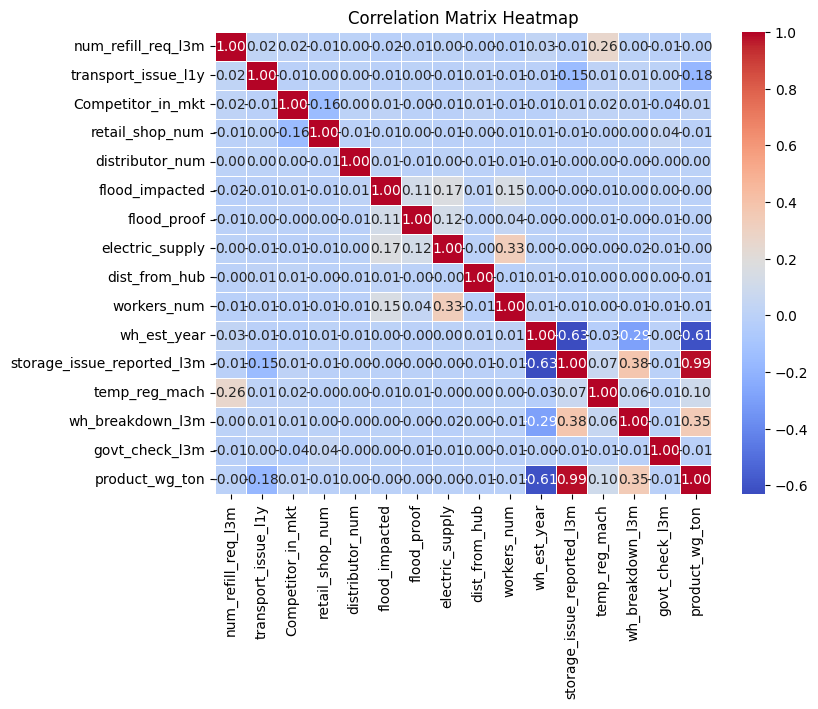

In [35]:
numerical_columns = df1.select_dtypes(include=['number'])
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- A perfect positive correlation (0.99) is found between Product weight (product_wg_ton) and storage issues reported (storage_issue_reported_l3m).
- Also wh_est_year (Year at which warehouse was established) has a positive correlation of 0.63 with storage_issue_reported_l3m (storage issues reported) and 0.61 with product_wg_ton (weight of product in tons).

In [71]:
df1.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

Product Weight (product_wg_ton-Target variable)  Vs Numeric Features (Number of refill requirement, Number of workers, Wrehouse Establishment Year,Storage Issues, Warehouse Breakdowns)

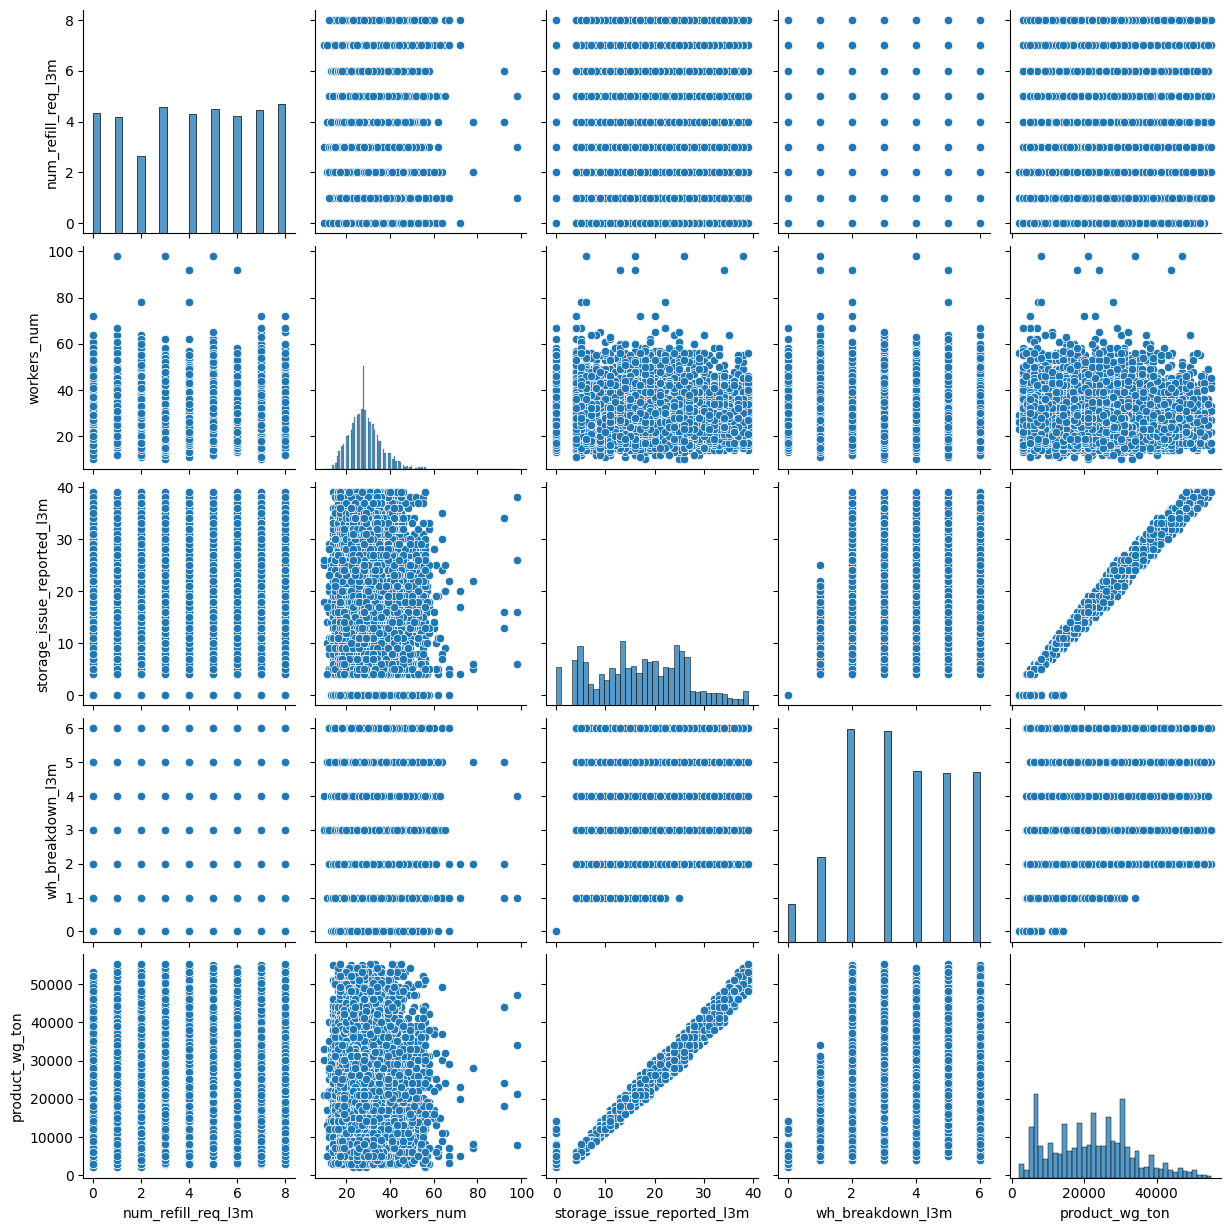

In [76]:
selected_cols = ['num_refill_req_l3m', 'workers_num', 'storage_issue_reported_l3m', 'wh_breakdown_l3m','product_wg_ton']

# Create a DataFrame with only the selected columns
selected_df = df1[selected_cols]

# Create the pairplot
sns.pairplot(selected_df, diag_kind='hist')  
plt.show()

### Encoding Categorical Variables

In [36]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of df1 as df_encoded
df_encoded = df1.copy()

categorical_cols = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

for col in categorical_cols:
    label_encoder = LabelEncoder()
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
    
df_encoded

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29,2009,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31,2009,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37,2009,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21,2009,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25,2009,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,1,0,3,5,3,1,6,4779,1,70,...,0,240,19,2009,14,0,3,5,23,16094
16616,1,0,1,4,2,0,2,5718,0,26,...,1,164,30,2009,17,0,3,6,24,21113
16617,0,0,1,5,5,0,4,4514,0,50,...,1,211,24,2003,24,1,2,5,29,28117
16618,0,2,3,5,3,2,3,5829,1,59,...,1,119,28,2007,16,0,0,5,15,21103


In [37]:
print("Columns of the encoded dataframe are:\n\n",df_encoded.columns)

Columns of the encoded dataframe are:

 Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')


In [38]:
print("Shape of the encoded dataframe is:\n",df_encoded.shape)

Shape of the encoded dataframe is:
 (16620, 22)


All the catecogrical variables have now been encoded using label encoding and now the dataframe 'df_encoded' has 16620 rows and 21 columns.

#### Splitting dataframe into predictor variables (X) and target variable(y)

Considering 'df_encoded' to be the 'train dataset' and splitting it into predictor features (X) and target variable (y).

In [39]:
X_train = df_encoded.drop(columns=['product_wg_ton'])
y_train = df_encoded['product_wg_ton']

In [40]:
X_train.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,3,1,2,4651,1,24,...,1,1,91,29,2009,13,0,0,5,15
1,0,0,1,4,0,0,4,6217,0,47,...,0,1,210,31,2009,4,0,0,3,17
2,0,1,2,1,1,0,4,4306,0,64,...,0,0,161,37,2009,17,0,0,6,22
3,0,1,1,2,7,4,2,6000,1,50,...,0,0,103,21,2009,17,1,1,3,27
4,0,0,1,4,3,1,2,4740,0,42,...,0,1,112,25,2009,18,0,4,6,24


In [41]:
y_train

0        17115
1         5074
2        23137
3        22115
4        24071
         ...  
16615    16094
16616    21113
16617    28117
16618    21103
16619    38097
Name: product_wg_ton, Length: 16620, dtype: int64

### Test Data Preprocessing

Following the same steps of preprocessing train data for test data as well.

In [42]:
test = pd.read_csv(r"C:\Entri\ML_Projects\Capstone\supply_test.csv")
test

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [43]:
test.shape

(5529, 25)

There are 5529 rows and 25 columns in test set.

In [44]:
test.columns.to_list()

['Unnamed: 0',
 'Ware_house_ID',
 'WH_Manager_ID',
 'Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'num_refill_req_l3m',
 'transport_issue_l1y',
 'Competitor_in_mkt',
 'retail_shop_num',
 'wh_owner_type',
 'distributor_num',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'dist_from_hub',
 'workers_num',
 'wh_est_year',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'approved_wh_govt_certificate',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'product_wg_ton']

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

##### Identifying duplicate rows

In [46]:
#count of duplicate rows in the test set
test.duplicated().sum()

0

There are no duplicate rows in test data.

##### Removing irrelevant columns

In [47]:
# Dropping columns which are not of much relevence while developing a model
test.drop(columns=['Unnamed: 0','Ware_house_ID','WH_Manager_ID'],inplace=True)
test.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Rural,Large,North,Zone 5,5,0,3,5590,Company Owned,15,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,Rural,Large,North,Zone 5,5,0,2,5856,Company Owned,40,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,Rural,Small,North,Zone 6,3,0,3,4803,Rented,40,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,Rural,Mid,West,Zone 4,5,2,2,4784,Rented,15,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,Urban,Mid,North,Zone 4,6,0,4,3699,Rented,24,...,0,205,20.0,1999.0,25,0,B,4,26,29071


##### Identifying and replacing missing values

In [48]:
# Count of missing values
test.isnull().sum()

Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

Null values are found in 'workers_num' (number of workers), 'wh_est_year'(year the warehouse was established) and 'approved_wh_govt_certificate' columns.

In [49]:
test['workers_num'].describe()

count    5319.000000
mean       29.010528
std         7.848478
min        10.000000
25%        24.000000
50%        28.000000
75%        33.000000
max        98.000000
Name: workers_num, dtype: float64

In [50]:
# Replacing missing values in 'workers_num' with median value
test['workers_num'].fillna(test['workers_num'].median(),inplace=True)

In [51]:
# Replacing missing values in 'wh_est_year' with mean
test['wh_est_year'].fillna(test['wh_est_year'].mean(),inplace=True)

In [52]:
# Mode of 'approved_wh_govt_certificate'
test['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [53]:
# Replacing missing values in 'approved_wh_govt_certificate' with mode
test['approved_wh_govt_certificate'].fillna(test['approved_wh_govt_certificate'].mode()[0],inplace=True)

In [54]:
# count of null values column wise
test.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

All the missing values in test set has been replaced.

##### Encoding categorical variables

In [55]:
# Create a copy of test as test_encoded
test_encoded = test.copy()

categorical_cols = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

for col in categorical_cols:
    label_encoder = LabelEncoder()
    test_encoded[col] = label_encoder.fit_transform(test_encoded[col])

test_encoded

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,0,1,4,5,0,3,5590,0,15,...,0,156,30.0,2006.000000,24,0,0,2,5,30132
1,0,0,1,4,5,0,2,5856,0,40,...,1,79,31.0,2019.000000,5,1,4,2,24,6075
2,0,2,1,5,3,0,3,4803,1,40,...,1,70,41.0,2008.000000,19,1,1,5,9,24076
3,0,1,3,3,5,2,2,4784,1,15,...,1,255,33.0,2017.000000,9,1,1,3,11,13092
4,1,1,1,3,6,0,4,3699,1,24,...,0,205,20.0,1999.000000,25,0,2,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,0,0,1,5,8,1,3,5030,1,46,...,1,203,28.0,2007.000000,22,1,1,2,4,29138
5525,0,2,2,5,3,1,3,4320,1,60,...,0,170,28.0,2009.572785,26,0,4,5,9,33108
5526,0,0,1,5,7,2,2,5268,0,64,...,0,99,22.0,2009.572785,20,0,3,6,4,24072
5527,0,0,1,5,6,2,4,4378,1,32,...,0,220,17.0,2009.572785,13,0,2,3,28,15055


In [56]:
print("Columns of the encoded dataframe are:\n\n",test_encoded.columns)

Columns of the encoded dataframe are:

 Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')


In [57]:
print("Shape of the encoded dataframe is:\n",test_encoded.shape)

Shape of the encoded dataframe is:
 (5529, 22)


##### Splitting test dataframe into predictor variables (X) and target variable(y)

In [58]:
X_test = test_encoded.drop(columns=['product_wg_ton'])
y_test = test_encoded['product_wg_ton']
X_test

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,0,0,1,4,5,0,3,5590,0,15,...,0,0,156,30.0,2006.000000,24,0,0,2,5
1,0,0,1,4,5,0,2,5856,0,40,...,0,1,79,31.0,2019.000000,5,1,4,2,24
2,0,2,1,5,3,0,3,4803,1,40,...,0,1,70,41.0,2008.000000,19,1,1,5,9
3,0,1,3,3,5,2,2,4784,1,15,...,0,1,255,33.0,2017.000000,9,1,1,3,11
4,1,1,1,3,6,0,4,3699,1,24,...,0,0,205,20.0,1999.000000,25,0,2,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,0,0,1,5,8,1,3,5030,1,46,...,0,1,203,28.0,2007.000000,22,1,1,2,4
5525,0,2,2,5,3,1,3,4320,1,60,...,0,0,170,28.0,2009.572785,26,0,4,5,9
5526,0,0,1,5,7,2,2,5268,0,64,...,0,0,99,22.0,2009.572785,20,0,3,6,4
5527,0,0,1,5,6,2,4,4378,1,32,...,0,0,220,17.0,2009.572785,13,0,2,3,28


In [59]:
y_test

0       30132
1        6075
2       24076
3       13092
4       29071
        ...  
5524    29138
5525    33108
5526    24072
5527    15055
5528    14103
Name: product_wg_ton, Length: 5529, dtype: int64

### Regression Modeling and Analysis for Warehouse Supply Quantity Optimization

In [60]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Training and Evaluating a Linear Regression Model

##### Numerical feature Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler
# Creating scaler object
scaler = MinMaxScaler()

# Creating copy of X_train and X_test
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

cols_to_scale = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m']

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_scaled[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])

Min-Max scaling is applied to specific columns of the training and test datasets to transform these columns to a common scale, where values are normalized between 0 and 1. 

In [62]:
X_train_scaled.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,0.375,0.2,0.166667,0.308044,1,0.163636,...,1,1,0.166667,0.215909,2009,0.333333,0,0,0.833333,0.451613
1,0,0,1,4,0.000,0.0,0.333333,0.478502,0,0.581818,...,0,1,0.717593,0.238636,2009,0.102564,0,0,0.500000,0.516129
2,0,1,2,1,0.125,0.0,0.333333,0.270491,0,0.890909,...,0,0,0.490741,0.306818,2009,0.435897,0,0,1.000000,0.677419
3,0,1,1,2,0.875,0.8,0.166667,0.454882,1,0.636364,...,0,0,0.222222,0.125000,2009,0.435897,1,1,0.500000,0.838710
4,0,0,1,4,0.375,0.2,0.166667,0.317732,0,0.490909,...,0,1,0.263889,0.170455,2009,0.461538,0,4,1.000000,0.741935


In [63]:
X_test_scaled.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,0,0,1,4,0.625,0.0,0.250000,0.410254,0,0.000000,...,0,0,0.467593,0.227273,2006.0,0.615385,0,0,0.333333,0.129032
1,0,0,1,4,0.625,0.0,0.166667,0.439208,0,0.454545,...,0,1,0.111111,0.238636,2019.0,0.128205,1,4,0.333333,0.741935
2,0,2,1,5,0.375,0.0,0.250000,0.324589,1,0.454545,...,0,1,0.069444,0.352273,2008.0,0.487179,1,1,0.833333,0.258065
3,0,1,3,3,0.625,0.4,0.166667,0.322521,1,0.000000,...,0,1,0.925926,0.261364,2017.0,0.230769,1,1,0.500000,0.322581
4,1,1,1,3,0.750,0.0,0.333333,0.204419,1,0.163636,...,0,0,0.694444,0.113636,1999.0,0.641026,0,2,0.666667,0.806452


Linear regression is sensitive to feature scaling because it ensures that the coefficients are interpretable and comparable, preventing features with larger scales from dominating the learning process and enabling faster convergence in optimization algorithms like gradient descent. Additionally, scaling mitigates the impact of outliers, maintaining the integrity of the linear relationship between features and the target variable.

In [64]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_predict = lr_model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R2 score
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 3075427.3724784534
Root Mean Squared Error (RMSE): 1753.6896454271644
R-squared (R2) Score: 0.9773196389348151


#### Comparing and Evaluating Ensemble Learning Algorithms: Gradient Boost, AdaBoost, Random Forest, and Bagging

In [65]:
# Initialize and train the regression models
models = {
    # model objects
    'Random Forest Regressor': RandomForestRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ada Boosting': AdaBoostRegressor()
}

# Initialize empty lists to store evaluation metrics
model_names = []
mse_scores = []
rmse_scores = []
r2_scores = []

# Fit the regression model and calculate evaluation metrics for each algorithm
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    model_names.append(name)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
        

# Create a DataFrame to store the evaluation metrics
eval_metrics_df = pd.DataFrame({
    'Algorithm': model_names,
    'Mean Squared Error(MSE)': mse_scores,
    'Root Mean Squared Error(RMSE)': rmse_scores,
    'R^2 Score': r2_scores
})

# Sort the DataFrame by R^2 Score in descending order
eval_metrics_df = eval_metrics_df.sort_values(by='R^2 Score', ascending=False).reset_index(drop=True)
eval_metrics_df['Mean Squared Error(MSE)'] = eval_metrics_df['Mean Squared Error(MSE)'].apply(lambda x: format(x, '.4f'))
eval_metrics_df

,Algorithm,Mean Squared Error(MSE),Root Mean Squared Error(RMSE),R^2 Score
0,Gradient Boosting,828181.7937,910.044940,0.993892
1,Random Forest Regressor,835805.7076,914.224101,0.993836
2,Bagging Regressor,921636.7651,960.019148,0.993203
3,Ada Boosting,2909177.4008,1705.631086,0.978546


From the above evaluation metrics, model developed using Gradient Boosting Regressor algorithm is found to be most accurate followed by Random Forest Regressor. The algorithms are evaluated on the basis of MSE, RMSE and R^2 Score.
- MSE: Mean Squared Error
  MSE measures the average squared difference between predicted values and actual values in a dataset. It quantifies the average   of the squared errors or residuals, indicating how far off the predictions are from the actual data points. It's a common       metric used to evaluate the accuracy of regression models.
 
 
- RMSE: Root Mean Squared Error
  RMSE is the square root of the Mean Squared Error (MSE).  
  RMSE provides an estimate of the standard deviation of the residuals, which helps in understanding the       typical magnitude   of prediction errors.
 
 
- R^2 Score: Coefficient of Determination (R-squared)
  R^2 (R-squared) is a statistical measure that represents the proportion of the variance in the dependent variable (target)       that is explained by the independent variables (features) in a regression model. It ranges from 0 to 1, with higher values       indicating a better fit of the model to the data. R^2 is often used to assess the goodness of fit of a regression model.
  
  Based on the evaluation metrics, **Gradient Boosting algorithm** stands out as the most accurate choice for the regression task, demonstrating the smallest errors and the highest capacity to explain variance in the data.|

#### Hyperparameter Tuning with Randomized Search Cross-Validation

In [66]:
from sklearn.model_selection import RandomizedSearchCV

# Create the GradientBoostingRegressor
regressor = GradientBoostingRegressor()

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist,
                                   scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create a DataFrame to display the CV results
cv_results = pd.DataFrame(random_search.cv_results_)

# Print the DataFrame with CV results
print("Randomized Search CV Results:")
cv_results

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Randomized Search CV Results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.333400,0.381341,0.015620,0.000017,150,5,0.01,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-7.989772e+06,-8.098977e+06,-8.176604e+06,-8.247882e+06,-7.679806e+06,-8.038608e+06,198799.657572,9
1,4.415726,0.035049,0.015661,0.000069,100,4,0.1,"{'n_estimators': 100, 'max_depth': 4, 'learnin...",-7.583085e+05,-7.974787e+05,-7.210050e+05,-8.127640e+05,-7.380879e+05,-7.655288e+05,34754.765726,4
2,1.637353,0.006244,0.012501,0.006250,50,3,0.1,"{'n_estimators': 50, 'max_depth': 3, 'learning...",-9.627233e+05,-9.876990e+05,-9.374099e+05,-1.048982e+06,-9.632038e+05,-9.800035e+05,37979.626731,8
3,2.215767,0.012351,0.006252,0.007657,50,4,0.2,"{'n_estimators': 50, 'max_depth': 4, 'learning...",-7.492930e+05,-8.056967e+05,-7.213091e+05,-8.096984e+05,-7.465986e+05,-7.665192e+05,35033.819624,5
4,1.668810,0.023183,0.006250,0.007655,50,3,0.01,"{'n_estimators': 50, 'max_depth': 3, 'learning...",-5.161619e+07,-5.239056e+07,-5.324776e+07,-5.236196e+07,-5.056593e+07,-5.203648e+07,898630.124913,10
5,7.088229,1.953253,0.028127,0.033350,150,3,0.1,"{'n_estimators': 150, 'max_depth': 3, 'learnin...",-7.592790e+05,-7.907949e+05,-7.299110e+05,-8.246773e+05,-7.601747e+05,-7.729674e+05,32238.517443,6
6,6.151927,0.485493,0.012504,0.006252,100,5,0.1,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-7.293088e+05,-7.764182e+05,-7.074804e+05,-8.038101e+05,-7.282228e+05,-7.490481e+05,35494.232163,1
7,9.733672,0.702119,0.021872,0.007650,150,5,0.1,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-7.320124e+05,-7.875024e+05,-7.089240e+05,-8.047869e+05,-7.336468e+05,-7.533745e+05,36412.416050,2
8,2.488003,0.189615,0.012501,0.006251,50,4,0.1,"{'n_estimators': 50, 'max_depth': 4, 'learning...",-8.298632e+05,-8.550777e+05,-7.909092e+05,-9.087228e+05,-8.071448e+05,-8.383435e+05,41300.280177,7
9,3.216433,0.358110,0.006260,0.007667,50,5,0.2,"{'n_estimators': 50, 'max_depth': 5, 'learning...",-7.378477e+05,-7.866147e+05,-7.152413e+05,-8.011832e+05,-7.282852e+05,-7.538344e+05,33805.971809,3


**Randomized Search Cross-Validation** is utilized to systematically search for the most effective hyperparameters for a Gradient Boosting Regressor model. It conducts multiple iterations, trying out different combinations of hyperparameters (such as the number of trees, learning rate, and max tree depth), with the goal of minimizing mean squared error during cross-validation. The process identifies the best model and the hyperparameter values that result in the lowest mean squared error. Subsequently, this optimal model is evaluated on a test dataset, generating metrics like Mean Squared Error, Root Mean Squared Error, and R-squared to assess its predictive performance. Additionally, the code compiles cross-validation results into a DataFrame, offering a comprehensive overview of the search outcomes and the selected best-performing model.

In [60]:
# Print the best model and its parameters
print("\nBest Model:")
print(best_model)
print("\nBest Parameters:")
print(best_params)

# Print evaluation metrics of the best model
print("\nEvaluation Metrics for Best Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")


Best Model:
GradientBoostingRegressor(max_depth=5)

Best Parameters:
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

Evaluation Metrics for Best Model:
Mean Squared Error (MSE): 802552.71
Root Mean Squared Error (RMSE): 895.85
R-squared (R^2): 0.99


#### Predictions using best model

In [67]:
# Predict using the best model
y_pred = best_model.predict(X_test)

# Create a DataFrame to store y_test and y_pred
results_df = pd.DataFrame({'Actual Values (y_test)': y_test, 'Predicted Values (y_pred)': y_pred})

# Print the DataFrame
print("\nActual vs. Predicted Values:")
results_df


Actual vs. Predicted Values:


,Actual Values (y_test),Predicted Values (y_pred)
0,30132,30871.470155
1,6075,6885.707423
2,24076,25357.568954
3,13092,12802.644024
4,29071,29730.794840
...,...,...
5524,29138,29367.149278
5525,33108,33840.326312
5526,24072,23407.043010
5527,15055,15373.879765


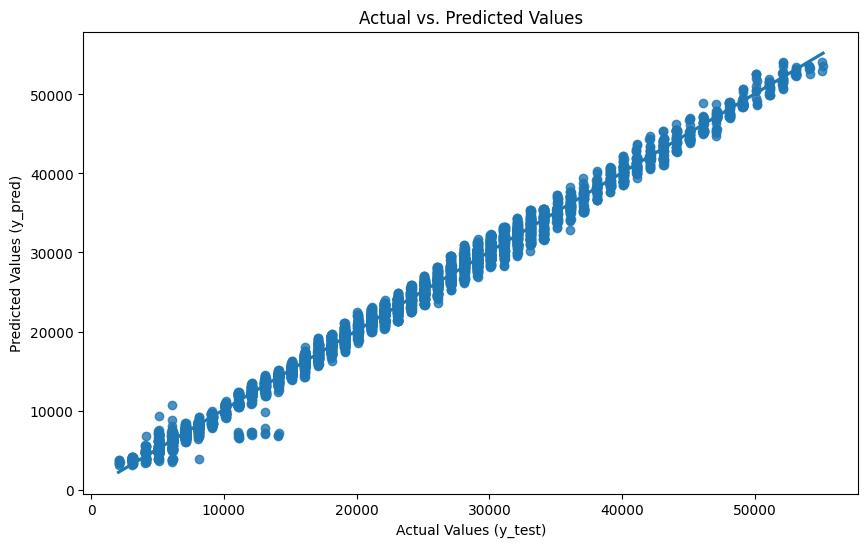

In [68]:
# Plot a regression plot of Actual and Predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Values (y_test)', y='Predicted Values (y_pred)', data=results_df)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()

The actual values and predicted values produced by optimized Gradient Boosting Regressor model are compared above. 

### Conclusion

After identifying the best model through Randomized Search Cross-Validation, the model's predictions closely resemble the actual values, taking into consideration the range and variability of the target variable in the dataset. Specifically, the RMSE value of 895.85 implies that, on average, the model's predictions differ from the actual product weights by around 895.85 tons. The acceptability of this model depends on how well it aligns with real-world considerations and its ability to meet the broader business objectives.